In [34]:
import numpy as np

In [35]:
import matplotlib.pyplot as plt

In [36]:
eV = 1e0
keV = 1e3
MeV = 1e6
GeV = 1e9
TeV = 1e12

v_h = 246 *GeV

alphaW = 1/29     
sW2 = 0.231        
mW = 80.379 *GeV        
mMu = 0.10566 *GeV      
GammaMu = 2.996e-19* GeV
mZ = 91.1876 *GeV
mh=125.10 *GeV        
G_F = 1.1663787e-5 /GeV**2

#Bounds
upper_cosmological_bound = 0.12 
lower_cosmological_bound = 0.058

eta_ee_bound = 1.4e-3
eta_mumu_bound = 1.4e-4
eta_tautau_bound = 8.9e-4
eta_e_mu_bound = 1.2e-5
eta_e_tau_bound = 8.8e-4
eta_mu_tau_bound = 1.8e-4

BR_e_mu_bound = 3.1e-13
BR_e_tau_bound = 3.3e-8
BR_mu_tau_bound = 4.2e-8

mtop=172.76*GeV
mbottom=4.18*GeV
mtau=1.77686*GeV

#Measured values

delta_m21_sq_True = 7.49e-5 
delta_m31_sq_normal_True = 2.534e-3 


error_delta_m21_sq = 0.19e-5 
error_delta_m31_sq_normal = 0.025e-3 

error_21_bound= error_delta_m21_sq/delta_m21_sq_True
error_31_bound= error_delta_m31_sq_normal/delta_m31_sq_normal_True

#paramter ranges
max_lam_D = 1/np.sqrt(10)
min_lam_D = 1e-2
max_lamN = 1
min_lamN = 0.5
max_lamL_lamR = 1.5e-12
min_lamL_lamR = 0.5e-12
max_v_s = 3*TeV
min_v_s = 1*TeV

In [37]:
Br_constant = (alphaW**3 * sW2)/(256*(np.pi)**2)*(mMu**5/(mW**4 *GammaMu)) 

def I(x):
    return -(2 *x**3 + 5 * x**2 - x)/ (4* (1 - x)**3) - 3 *x**3 *np.log(x)/(2* (1 - x)**4)


def BrAlphaToBetagamma(startflavour, endflavour, K, masses):
    return Br_constant * abs(sum([K[startflavour, i].conjugate()* K[endflavour, i] * I((masses[i]/mW)**2) for i in range(len(masses))]))**2

In [38]:
def rand_cplx_matrix(yukawa,vev):
    return (np.random.uniform(0.9, 1, (3, 3)) * np.exp(1j*np.random.uniform(0,2*np.pi,(3,3)))) * yukawa * vev

def rand_sym_cplx_matrix(yukawa,vev):
    a = (np.random.uniform(0.9, 1, (3, 3)) * np.exp(1j*np.random.uniform(0,2*np.pi,(3,3))))
    return (a + a.T)/2 * yukawa * vev

zero_matrix = np.zeros((3, 3))


rand_cplx_matrix(1, 1)

array([[ 0.31206181-0.85690616j, -0.67367981+0.72479226j,
        -0.76505337+0.49725111j],
       [ 0.55240294+0.78425433j,  0.1066512 +0.95410219j,
        -0.95338353+0.09488653j],
       [-0.7648723 -0.60823592j,  0.80113091-0.48227081j,
        -0.90353428+0.05053042j]])

In [39]:
def m_D(yukawa):
    return rand_cplx_matrix(yukawa, v_h)

def m_N(yukawa,v_s):
    return rand_cplx_matrix(yukawa, v_s)

def m_L(yukawa,v_s):
    return rand_sym_cplx_matrix(yukawa, v_s)

def m_R(yukawa,v_s):
    return rand_sym_cplx_matrix(yukawa, v_s)

def M_D(m_D):
    return np.vstack((m_D, zero_matrix))

def M_S(m_L, m_R, m_N):
    upper = np.hstack((m_R, m_N.T))
    lower = np.hstack((m_N, m_L))
    return np.vstack((upper, lower))

def M_nu(M_D, M_S):
    upper = np.hstack((zero_matrix, M_D.T))
    lower = np.hstack((M_D, M_S))
    return np.vstack((upper, lower))


def G_1(M_D, M_S):
    return (M_D.T @ np.linalg.inv(M_S)).conj()

def K_heavy(G1 ,U):
    return G1 @ U

def eta_matrix(m_D, m_N):
    return 1/2 * m_D.conj().T * (np.linalg.inv(m_N)).conj() @ (np.linalg.inv(m_N)).T @ m_D

In [40]:
m_1_min = 0
m_1_max = 0.03  


def mass_generator(m_1):
    #Assuming one mass eigenvalue to be 0 in normal ordering -> Calculate masses from measured mass squared differences
    mass_m1_normal = m_1
    mass_m2_normal = np.sqrt(mass_m1_normal**2 + delta_m21_sq_True)
    mass_m3_normal = np.sqrt(mass_m1_normal**2 + delta_m31_sq_normal_True)
    return mass_m1_normal, mass_m2_normal, mass_m3_normal



# angles in degrees and delta CP phase
th12, th23, th13, delta = 33.68, 43.3, 8.56, 212

th12_max = th12 + 0.73
th12_min = th12 - 0.70
th_23_max = th23 + 1
th_23_min = th23 - 0.8
th13_max = th13 + 0.11
th13_min = th13 - 0.11
delta_max = delta + 26
delta_min = delta - 41




c12, c23, c13 = np.cos(np.radians(th12)), np.cos(np.radians(th23)), np.cos(np.radians(th13))
s12, s23, s13 = np.sin(np.radians(th12)), np.sin(np.radians(th23)), np.sin(np.radians(th13))

# PMNS-Matrix
PMNS = np.array([
    [c12*c13, s12*c13, s13*np.exp(-1j*delta)],
    [-s12*c23 - c12*s23*s13*np.exp(1j*delta),
     c12*c23 - s12*s23*s13*np.exp(1j*delta),
     s23*c13],
    [s12*s23 - c12*c23*s13*np.exp(1j*delta),
     -c12*s23 - s12*c23*s13*np.exp(1j*delta),
     c23*c13]
])



PMNS_abs = np.abs(PMNS)

#PMNS Matrix

print("U_PMNS=",PMNS)

print("U_PMNS_abs=",PMNS_abs)





print("Unitarity check U_PMNS*U_PMNS^dagger=",PMNS @ PMNS.conj().T)

U_PMNS= [[ 0.82287807+0.j          0.54837655+0.j         -0.00855449+0.148599j  ]
 [-0.39870722+0.08480577j  0.60886793+0.05651566j  0.6781787 +0.j        ]
 [ 0.38550402+0.0899937j  -0.5672497 +0.05997296j  0.71966576+0.j        ]]
U_PMNS_abs= [[0.82287807 0.54837655 0.14884502]
 [0.40762663 0.61148522 0.6781787 ]
 [0.39586894 0.57041124 0.71966576]]
Unitarity check U_PMNS*U_PMNS^dagger= [[1.00000000e+00+0.j 1.12757026e-17+0.j 5.20417043e-18+0.j]
 [1.12757026e-17+0.j 1.00000000e+00+0.j 5.55111512e-17+0.j]
 [5.20417043e-18+0.j 5.55111512e-17+0.j 1.00000000e+00+0.j]]


In [41]:
#Calculate mass matrices 
def calculate_matrices(lamN, lamD, v_s):
    
    mass_m1_normal, mass_m2_normal, mass_m3_normal = mass_generator(m_1)

    D_light = np.diag([mass_m3_normal, mass_m2_normal, mass_m1_normal])
    
    
    M_l_fixed = PMNS.conj() @ D_light @ PMNS.conj().T

    mN = m_N(lamN, v_s)
    mD = m_D(lamD)



    mL = mN @ np.linalg.inv(mD.T) @ M_l_fixed @ np.linalg.inv(mD) @ mN .T

    lambdaL = np.abs(mL) / v_s 


    return mL, mN , mD, lambdaL

In [42]:
#Calculate light neutrino masses from mass matrices

#Should match with input masses!!!

def calculate_masses(lamN,lamD,lamR, v_s):
    
    
    mL, mN , mD, lambdaL = calculate_matrices(lamN, lamD, v_s)


    mR = m_R(lamR, v_s)
    MD = M_D(mD)
    mS = M_S(mL, mR, mN)
    Mnu = M_nu(MD, mS)
    G1 = G_1(MD, mS)

    

    U, masses, VH = np.linalg.svd(Mnu) 

    PMNS = U[:3, -3:]

    th13_calc = np.degrees(np.abs(np.arcsin(np.abs(PMNS[0,2]))))
    th12_calc= np.degrees(np.abs(np.arcsin(np.abs(PMNS[0,1]/np.cos(np.radians(th13_calc))))))
    th23_calc = np.degrees(np.abs(np.arcsin(np.abs(PMNS[1,2]/np.cos(np.radians(th13_calc))))))
    delta_calc = np.degrees(np.angle(PMNS[0,2].conj()))

    light_masses_heavy_to_light_ordering = masses[-3:]
    heavy_masses = masses[:6]

    mass_difference_21_calc = light_masses_heavy_to_light_ordering[1]**2 - light_masses_heavy_to_light_ordering[2]**2
    mass_difference_31_calc = light_masses_heavy_to_light_ordering[0]**2 - light_masses_heavy_to_light_ordering[2]**2
    
    
    sum_light_masses = np.sum(light_masses_heavy_to_light_ordering)


    #U1 , heavy_masses , Vh = np.linalg.svd(mS)


    m_light = mD.T  @ np.linalg.inv(mN) @ mL @ np.linalg.inv(mN).T @ mD
    
    #m_light = mD.T  @ np.linalg.inv(mN) @ mL @ np.linalg.inv(mN).T @ mD

    m_light_diag = PMNS.T @ m_light @ PMNS



    #K = K_heavy(G1, U1)

    K = U[:3, :6]
    U_R = U[2:6, 0:6]
    V_L = U[6:10, 0:6]





    Br_mu_to_e_gamma = BrAlphaToBetagamma(1, 0, K, heavy_masses)
    #Br_tau_to_e_gamma = BrAlphaToBetagamma(2, 0, K, heavy_masses)
    #Br_tau_to_mu_gamma = BrAlphaToBetagamma(2, 1, K, heavy_masses)

    eta= eta_matrix(mD, mN)


    return mR, m_light, m_light_diag, Br_mu_to_e_gamma, sum_light_masses, eta, light_masses_heavy_to_light_ordering , th12_calc, th13_calc, th23_calc, delta_calc, mass_difference_21_calc, mass_difference_31_calc,PMNS,K,heavy_masses,U_R,V_L

In [43]:
lamN = np.random.uniform(min_lamN, max_lamN)
lamD = np.random.uniform(min_lam_D, max_lam_D)
v_s = np.random.uniform(min_v_s, max_v_s)
lamR = np.random.uniform(min_lamL_lamR, max_lamL_lamR)
m_1 = np.random.uniform(m_1_min, m_1_max)


mL, mN , mD, lambdaL = calculate_matrices(lamN,lamD,v_s)

mR,m_light, m_light_diag,Br_mu_to_e_gamma, sum_light_masses, eta, light_masses_heavy_to_light_ordering , th12_calc, th13_calc, th23_calc, delta_calc, mass_difference_21_calc, mass_difference_31_calc ,PMNS_calc,K,heavy_masses,U_R,V_L= calculate_masses(lamN, lamD, lamR, v_s)


print("mass_difference_21_calc=",mass_difference_21_calc/delta_m21_sq_True)
print("mass_difference_31_calc=",mass_difference_31_calc/delta_m31_sq_normal_True)
print("mN=",mN/v_s)
print("mD=",mD/v_h)
print("mR=",mR/v_s)
print("v_s=",v_s/TeV)
print("lambL=", lambdaL)

print("m_light=",m_light)
print("m_light_diag=",m_light_diag)
print("mass_eigenvalues=",np.linalg.svd(m_light,compute_uv=False))
print("Br(mu to e gamma)=",Br_mu_to_e_gamma)
print("Sum of light neutrino masses=",sum_light_masses)
print("eta=",eta)

print("th12_calc=",th12_calc)
print("th13_calc=",th13_calc)
print("th23_calc=",th23_calc)
print("delta_calc=",delta_calc)
print("check=",light_masses_heavy_to_light_ordering)
print("PMNS_calc=",PMNS_calc)

mass_difference_21_calc= 1.024296321444395
mass_difference_31_calc= 0.984768931510992
mN= [[-0.72019159-0.02768553j -0.70995137+0.06590558j  0.26995432-0.6816125j ]
 [ 0.72057855+0.19586379j  0.57832775+0.44070972j  0.24247032+0.6573339j ]
 [ 0.47362651-0.56715372j -0.15522009-0.68875984j -0.70765334+0.03732225j]]
mD= [[ 0.06209491+0.20803522j  0.09332271-0.20975706j  0.21413155-0.02860028j]
 [ 0.17065821+0.13562699j -0.14793789+0.16243055j  0.06445544+0.20668381j]
 [ 0.05746164-0.22669436j  0.0300068 +0.22997564j -0.05052025-0.21137436j]]
mR= [[-8.15843534e-13+1.01032490e-13j  5.67322109e-13+3.29401964e-13j
   6.82304567e-13+9.82839566e-14j]
 [ 5.67322109e-13+3.29401964e-13j -6.14424046e-13-5.82864132e-13j
   3.27085874e-13+1.12571888e-13j]
 [ 6.82304567e-13+9.82839566e-14j  3.27085874e-13+1.12571888e-13j
   7.58774770e-13+4.06440807e-13j]]
v_s= 2.0738425809066503
lambL= [[6.33583276e-11 7.99833647e-11 4.22741546e-11]
 [7.99833647e-11 9.70134023e-11 4.54090103e-11]
 [4.22741546e-11 4.

In [44]:
v_s_fixed= 1.3 * TeV

valid_points = []

while True:
    lamN = np.random.uniform(min_lamN, max_lamN)
    lamD = np.random.uniform(min_lam_D, max_lam_D)
    v_s = np.random.uniform(min_v_s, max_v_s)
    lamR = np.random.uniform(min_lamL_lamR, max_lamL_lamR)
    m_1 = np.random.uniform(m_1_min, m_1_max)


    mL, mN , mD, lambdaL = calculate_matrices(lamN,lamD,v_s)

    mR,m_light, m_light_diag,Br_mu_to_e_gamma, sum_light_masses, eta, light_masses_heavy_to_light_ordering , th12_calc, th13_calc, th23_calc, delta_calc, mass_difference_21_calc, mass_difference_31_calc ,PMNS_calc,K,heavy_masses,U_R,V_L= calculate_masses(lamN, lamD, lamR, v_s)

    error_delta_m_21_calc = abs(mass_difference_21_calc - delta_m21_sq_True)/delta_m21_sq_True
    error_delta_m_31_calc = abs(mass_difference_31_calc - delta_m31_sq_normal_True)/delta_m31_sq_normal_True

    if delta_calc < 0:
        delta_calc += 360

    if  (error_delta_m_21_calc < error_21_bound and
        error_delta_m_31_calc < error_31_bound and
        abs(eta[0,0]) < eta_ee_bound and
        abs(eta[1,1]) < eta_mumu_bound and
        abs(eta[2,2]) < eta_tautau_bound and
        abs(eta[0,1]) < eta_e_mu_bound and
        abs(eta[0,2]) < eta_e_tau_bound and
        abs(eta[1,2]) < eta_mu_tau_bound and
        Br_mu_to_e_gamma < BR_e_mu_bound and 
        th12_min < th12_calc < th12_max and
        th13_min < th13_calc < th13_max and
        th_23_min < th23_calc < th_23_max and
        delta_min < delta_calc < delta_max ):

        valid_points.append((mL, mD, mR, v_s, m_light_diag, Br_mu_to_e_gamma, sum_light_masses, eta, light_masses_heavy_to_light_ordering , th12_calc, th13_calc, th23_calc, delta_calc, mass_difference_21_calc, mass_difference_31_calc ,PMNS_calc,K,heavy_masses,mN,U_R,V_L))
    
        if len(valid_points) % 1 == 0:
            print(len(valid_points))

        if len(valid_points)>=100:
            break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


[array([[-8.33398928e+10+1.38915554e+12j,  1.21766012e+12-7.42370697e+11j,
         8.54655552e+11+1.14526978e+12j],
       [ 5.82993784e+11+1.23723198e+12j, -1.29091302e+12+4.71275184e+11j,
        -1.37666788e+12+1.73276313e+11j],
       [ 1.32647904e+12+3.36442418e+11j, -6.96777794e+09+1.36828877e+12j,
        -1.06714694e+12-9.82609825e+11j]]), array([[-7.10300971e+11-5.94704160e+11j, -6.49517754e+11-6.60631163e+11j,
         5.95949787e+11-6.54237520e+11j],
       [-8.66616635e+11-3.97801512e+11j,  8.32769603e+11+4.58419064e+11j,
        -8.66326223e+11+9.49768771e+10j],
       [-3.23761203e+11+9.10372832e+11j,  2.22852347e+11-8.67875279e+11j,
        -5.69073762e+11-7.09474868e+11j]]), array([[ 1.24239985e+12+2.61074794e+10j,  5.05557634e+11-1.07099995e+12j,
         5.98644544e+11-1.12327363e+12j],
       [ 1.18051855e+12+1.40125459e+11j, -5.33263967e+11-1.05007103e+12j,
        -5.83450628e+11-1.09508016e+12j],
       [-6.08618107e+11+9.98591817e+11j,  1.29986589e+11-1.15165050

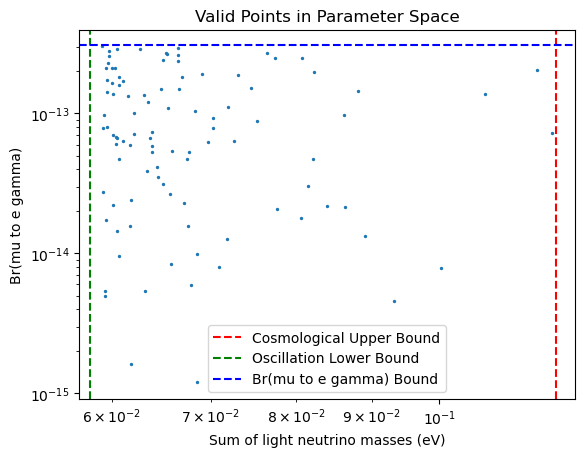

In [45]:
mL_list = [point[0] for point in valid_points]
mD_list = [point[1] for point in valid_points]
mR_list = [point[2] for point in valid_points]
v_s_list = [point[3] for point in valid_points]
m_light_diag_list = [point[4] for point in valid_points]
Br_mu_to_e_gamma_list = [point[5] for point in valid_points]
sum_light_masses_list = [point[6] for point in valid_points]
eta_list = [point[7] for point in valid_points]
light_masses_heavy_to_light_ordering_list = [point[8] for point in valid_points]
th12_calc_list = [point[9] for point in valid_points]
th13_calc_list = [point[10] for point in valid_points]
th23_calc_list = [point[11] for point in valid_points]
delta_calc_list = [point[12] for point in valid_points]
mass_difference_21_calc_list = [point[13] for point in valid_points]
mass_difference_31_calc_list = [point[14] for point in valid_points]
PMNS_calc_list = [point[15] for point in valid_points]
K_list = [point[16] for point in valid_points]
heavy_masses_list = [point[17] for point in valid_points]
mN_list = [point[18] for point in valid_points]
U_R_list = [point[19] for point in valid_points]
V_L_list = [point[20] for point in valid_points]
lambdaR = [mR/v_s_fixed for mR in mR_list]
lambdaL = [mL/v_s_fixed for mL in mL_list]
lambdaN = [mN/v_s_fixed for mN in mN_list]
mHeavy_normalized = [heavy_masses/TeV for heavy_masses in heavy_masses_list]
print(mN_list)
print("mHeavy_normalized=",mHeavy_normalized)

print("lambdaR=",lambdaR)
print("lambdaL=",lambdaL)
print("lambdaN=",lambdaN)

print("Heavy_mass",heavy_masses_list)


plt.scatter(sum_light_masses_list, Br_mu_to_e_gamma_list,s=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sum of light neutrino masses (eV)')
plt.ylabel('Br(mu to e gamma)')
plt.title('Valid Points in Parameter Space')
plt.axvline(x=upper_cosmological_bound, color='r', linestyle='--', label='Cosmological Upper Bound')
plt.axvline(x=lower_cosmological_bound, color='g', linestyle='--', label='Oscillation Lower Bound')
plt.axhline(y=BR_e_mu_bound, color='b', linestyle='--', label='Br(mu to e gamma) Bound')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


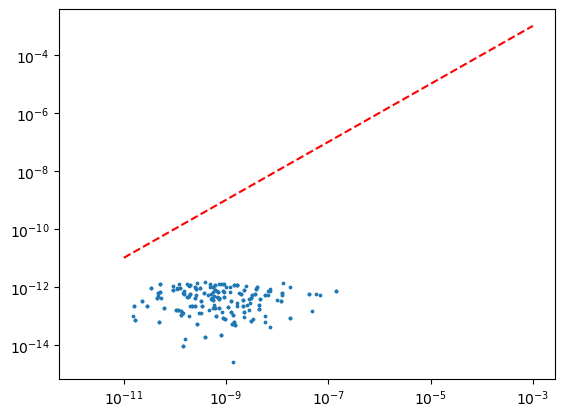

In [46]:
lambda_L_list = [m_l/vs for m_l, vs in zip(mL_list,v_s_list) ]
lambda_R_list = [m_r/v_s for m_r, v_s in zip(mR_list, v_s_list) ]
lambda_D_list = [m_d/v_h for m_d in mD_list ]
lambda_N_list = [m_N/v_s for m_N,v_s in zip(mN_list,v_s_list)]
#print("lambda_L_list=",lambda_L_list)
#print("lambda_D_list=",lambda_D_list)
#print(lambda_R_list)
plt.scatter(lambda_L_list,lambda_R_list,s=3)
plt.yscale('log')
plt.xscale('log')
x=np.linspace(1e-11,1e-3,100)
plt.plot(x,x, color='r', linestyle='--', label='lambda_L = lambda_R')

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_12795/3398184165.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\eta_{{e\\mu}}$')
/tmp/ipykernel_12795/3398184165.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.axhline(y=eta_e_mu_bound, color='r', linestyle='--', label=f'Experimental $\eta_{{e\\mu}}$ bound')


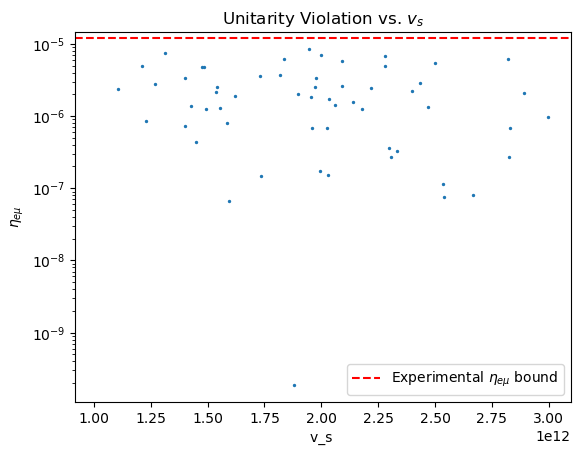

In [47]:
eta_e_mu = [eta[0,1] for eta in eta_list]
plt.scatter( v_s_list, eta_e_mu, s=2)
plt.yscale('log')
plt.xlabel('v_s ')
plt.ylabel('$\eta_{{e\\mu}}$')
plt.axhline(y=eta_e_mu_bound, color='r', linestyle='--', label=f'Experimental $\eta_{{e\\mu}}$ bound')
plt.legend()
plt.title('Unitarity Violation vs. $v_s$')
plt.show()


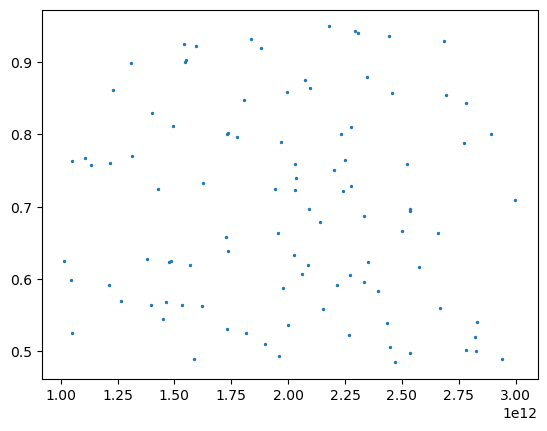

In [48]:
mean_lambda_N =[np.mean(np.abs(lamN)) for lamN in lambda_N_list]

plt.scatter(v_s_list, mean_lambda_N,s=2)

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6746: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


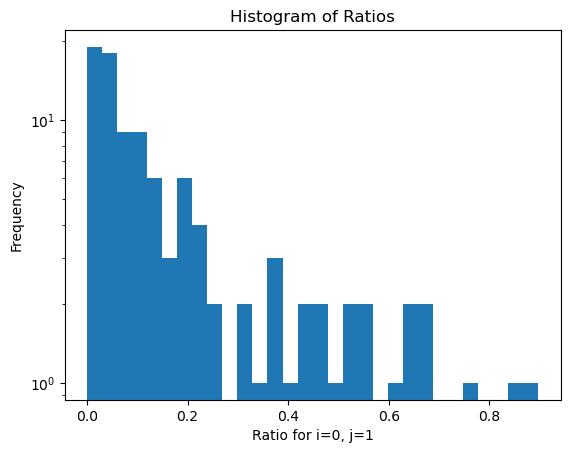

In [49]:
i=0
j=1

def ratio(h, i, j):
    H = h.conj().T @ h
    return abs(np.imag(H[i,j])**2) / (H[i,i] * H[j,j])

ratios = [ratio(h, i, j) for h in lambda_D_list]

plt.hist(ratios, bins=30, log=True)
plt.xlabel(f'Ratio for i={i}, j={j}')
plt.ylabel('Frequency')
plt.title('Histogram of Ratios')
plt.show()


100
100


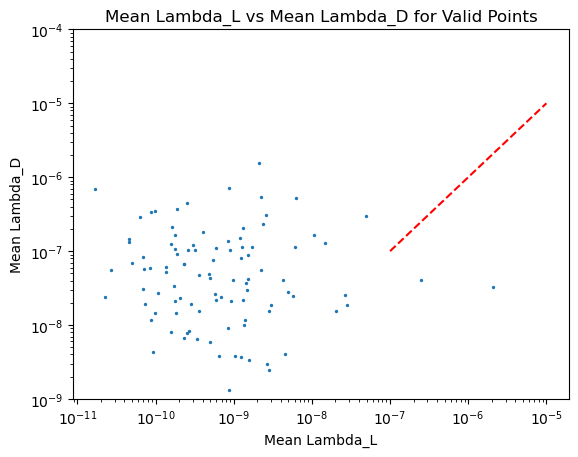

In [50]:
mean_lambda_L_R = [np.abs(np.mean(lam_L))+np.abs(np.mean(lam_R)) for lam_L, lam_R in zip(lambda_L_list, lambda_R_list)]
mean_lambda_D = [np.abs(np.mean(lam_D)**2)/(32*np.pi) * np.abs(np.mean(lam_N)) for lam_D,lam_N in zip(lambda_D_list, lambda_N_list)]
print(len(mean_lambda_L_R))
print(len(mean_lambda_D))

x= np.linspace(1e-7,1e-5,1000)

plt.scatter(mean_lambda_L_R,mean_lambda_D,s=2)
plt.plot(x,x, color='r', linestyle='--', label='y=x')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-9,1e-4)
plt.ylabel('Mean Lambda_D')
plt.xlabel('Mean Lambda_L')
plt.title('Mean Lambda_L vs Mean Lambda_D for Valid Points')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_12795/1997576349.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel(f'BR($\mu \\rightarrow$ e $\gamma$)')
/tmp/ipykernel_12795/1997576349.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f'BR($\mu \\rightarrow$ e $\gamma$) vs v_s for Valid Points')
/tmp/ipykernel_12795/1997576349.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.axhline(y=BR_e_mu_bound, color='b', linestyle='--', label=f' Current BR($\mu \\rightarrow$ e $\gamma$) Bound')


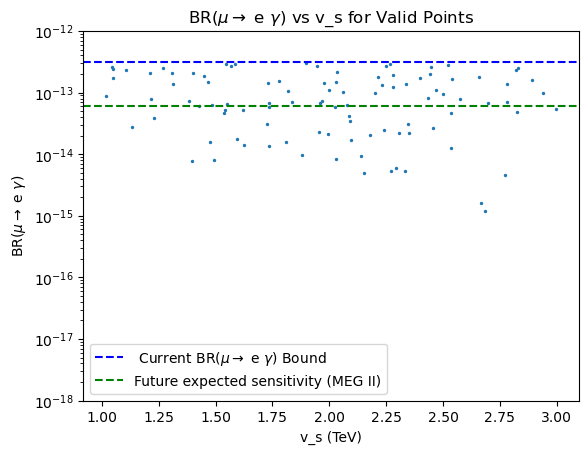

In [51]:
plt.scatter([v/10**12 for v in v_s_list], Br_mu_to_e_gamma_list,s=2)
plt.yscale('log')
plt.xlabel('v_s (TeV)')
plt.ylabel(f'BR($\mu \\rightarrow$ e $\gamma$)')
plt.title(f'BR($\mu \\rightarrow$ e $\gamma$) vs v_s for Valid Points')
plt.ylim(1e-18,1e-12)
plt.axhline(y=BR_e_mu_bound, color='b', linestyle='--', label=f' Current BR($\mu \\rightarrow$ e $\gamma$) Bound')
plt.axhline(y=6e-14, color='g', linestyle='--', label='Future expected sensitivity (MEG II)')
plt.legend()
plt.show()

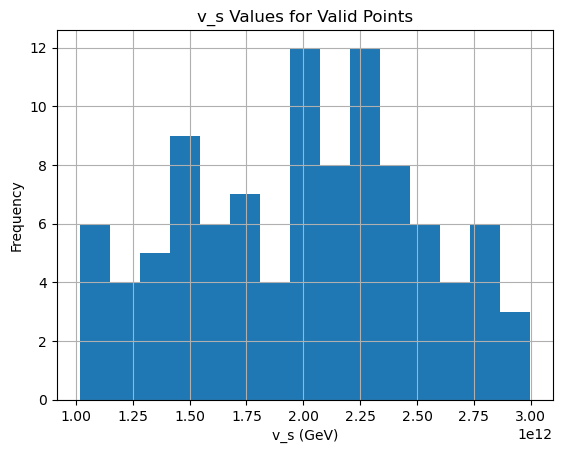

In [52]:
plt.hist(v_s_list, bins=15)
plt.xlabel('v_s (GeV)')
plt.ylabel('Frequency')
plt.title('v_s Values for Valid Points')
plt.grid(True)
plt.show()

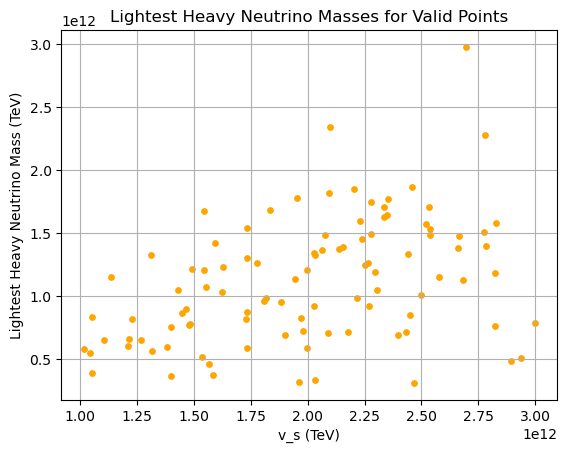

<Figure size 640x480 with 0 Axes>

In [53]:
lightest_heavy_mass = [min(point[17]) for point in valid_points]  # point[17] contains heavy_masses
second_lightest_heavy_mass = [sorted(point[17])[1] for point in valid_points]

plt.scatter(v_s_list, lightest_heavy_mass,s=15,c='orange')
plt.xlabel('v_s (TeV)')
plt.ylabel('Lightest Heavy Neutrino Mass (TeV)')
plt.title('Lightest Heavy Neutrino Masses for Valid Points')
plt.grid(True)  
plt.show()
plt.savefig('lightest_heavy_neutrino_mass_vs_vs.png')


100
100


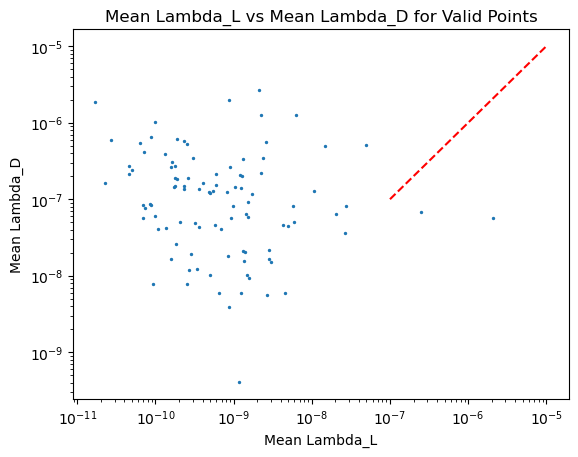

In [54]:
mean_lambda_L_R = [np.abs(np.mean(lam_L))+np.abs(np.mean(lam_R)) for lam_L, lam_R in zip(lambda_L_list, lambda_R_list)]
mean_lambda_D = [np.abs(np.mean(lam_D)**2)/(32*np.pi) * m_min/(np.sqrt(2)*v_s) for lam_D,m_min,v_s in zip(lambda_D_list, lightest_heavy_mass, v_s_list)]
print(len(mean_lambda_L_R))
print(len(mean_lambda_D))

x= np.linspace(1e-7,1e-5,1000)

plt.scatter(mean_lambda_L_R,mean_lambda_D,s=2)
plt.plot(x,x, color='r', linestyle='--', label='y=x')

plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e-11,1e-4)
plt.ylabel('Mean Lambda_D')
plt.xlabel('Mean Lambda_L')
plt.title('Mean Lambda_L vs Mean Lambda_D for Valid Points')
plt.show()

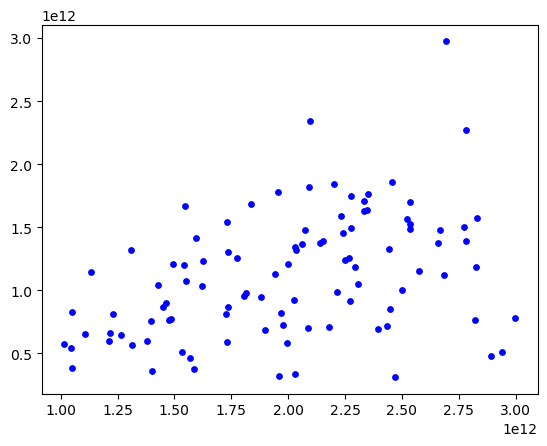

In [55]:
plt.scatter(v_s_list, second_lightest_heavy_mass,s=15,c='blue')

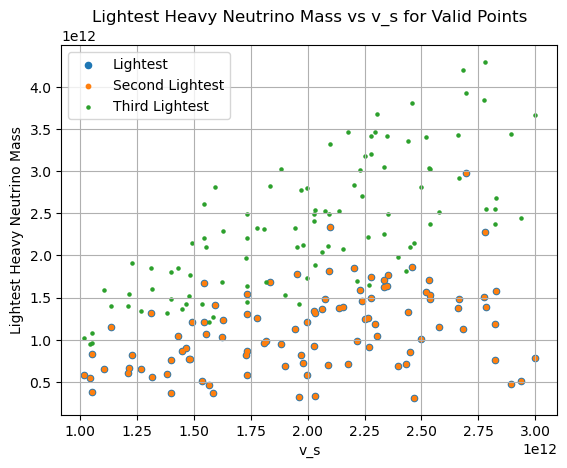

In [56]:
lightest_heavy_mass = [sorted(point[17])[0] for point in valid_points]  # point[17] contains heavy_masses
second_lightest_heavy_mass = [sorted(point[17])[1] for point in valid_points]
thrird_lightest_heavy_mass = [sorted(point[17])[2] for point in valid_points]

plt.scatter(v_s_list, lightest_heavy_mass,label='Lightest',s=20)
plt.scatter(v_s_list, second_lightest_heavy_mass,label='Second Lightest',s=10)
plt.scatter(v_s_list, thrird_lightest_heavy_mass,label='Third Lightest',s=5)
plt.xlabel('v_s')
plt.ylabel('Lightest Heavy Neutrino Mass')
plt.title('Lightest Heavy Neutrino Mass vs v_s for Valid Points')
plt.grid(True)
plt.legend()
plt.show()



In [57]:
ratio_mass = [light/heavy for light, heavy in zip(lightest_heavy_mass, second_lightest_heavy_mass)]

print("ratio_mass=",ratio_mass)

ratio_mass= [0.9999999992155916, 0.9999999984416076, 0.9999999988564297, 0.9999999999644021, 0.9999999996901259, 0.9999999993532251, 0.9999999991351322, 0.9999999997770666, 0.9999999993762172, 0.9999999999029445, 0.9999999994305837, 0.9999999982818913, 0.9999999986255161, 0.9999999999086762, 0.9999999832534149, 0.9999999992116304, 0.9999999934960344, 0.9999999975074364, 0.9999999867709684, 0.9999999928810364, 0.999999999084802, 0.9999999971138993, 0.9999999989046156, 0.9999999992824656, 0.9999999810977551, 0.9999999995141606, 0.9999999997046648, 0.9999999999556206, 0.9999999996062899, 0.9999999977496855, 0.9999999976523638, 0.9999999998362435, 0.9999999999400458, 0.999999998830919, 0.9999999982661958, 0.9999994162669995, 0.9999999986502135, 0.9999999992659006, 0.9999999987144776, 0.9999999998052383, 0.9999999975241921, 0.9999999982683209, 0.9999999849938581, 0.9999999974784314, 0.9999999992917393, 0.9999999969468988, 0.9999999995793987, 0.9999999990783046, 0.999999998484787, 0.99999999

In [58]:
def kinematic_factor(mSR, mNi, mNj):
    return (mSR**2 - (mNi + mNj)**2)**(3/2) * (mSR**2 - (mNi - mNj)**2)**0.5 / (8* np.pi * mSR**3)

def decaywidthSRtoN1N1(mSR, mNi_list, U_R, V_L, lN):
    M1 = mNi_list[5]  # Assuming mNi_list is sorted in descending order

    if mSR < M1 + M1:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M1, M1)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * (U_R[l1, 5] * V_L[l2, 5]+ U_R[l2, 5] * V_L[l1, 5])

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value 
    
def decaywidthsRtoN1N2(mSR, mNi_list, U_R, V_L, lN):
    M1 = mNi_list[5]  # Assuming mNi_list is sorted in descending order
    M2 = mNi_list[4]

    
    if mSR < M1 + M2:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M1, M2)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * (U_R[l1, 5] * V_L[l2, 4] + U_R[l1, 4] * V_L[l2, 5])

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value
    

def decaywidthSRtoN2N2(mSR, mNi_list, U_R, V_L, lN):
    M2 = mNi_list[4]  # Assuming mNi_list is sorted in descending order

    
    if mSR < M2 + M2:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M2, M2)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * U_R[l1, 4] * V_L[l2, 4]

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value


def decaywidthSRtoN1N3(mSR, mNi_list, U_R, V_L, lN):
    M1 = mNi_list[5]  # Assuming mNi_list is sorted in descending order
    M3 = mNi_list[3]

    
    if mSR < M1 + M3:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M1, M3)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * (U_R[l1, 5] * V_L[l2, 3] + U_R[l1, 3] * V_L[l2, 5])

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value
    
def decaywidthSRtoN2N3(mSR, mNi_list, U_R, V_L, lN):
    M2 = mNi_list[4]  # Assuming mNi_list is sorted in descending order
    M3 = mNi_list[3]

    
    if mSR < M2 + M3:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M2, M3)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * (U_R[l1, 4] * V_L[l2, 3] + U_R[l1, 3] * V_L[l2, 4])

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value
    

def decaywidthSRtoN3N3(mSR, mNi_list, U_R, V_L, lN):
    M3 = mNi_list[3]  # Assuming mNi_list is sorted in descending order

    
    if mSR < M3 + M3:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M3, M3)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * U_R[l1, 3] * V_L[l2, 3]

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value
    

def decaywidthSRtoN1N4(mSR, mNi_list, U_R, V_L, lN):
    M1 = mNi_list[5]  # Assuming mNi_list is sorted in descending order
    M4 = mNi_list[2]

    
    if mSR < M1 + M4:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M1, M4)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * (U_R[l1, 5] * V_L[l2, 2] + U_R[l1, 2] * V_L[l2, 5])

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value
    
def decaywidthSRtoN2N4(mSR, mNi_list, U_R, V_L, lN):
    M2 = mNi_list[4]  # Assuming mNi_list is sorted in descending order
    M4 = mNi_list[2]

    
    if mSR < M2 + M4:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M2, M4)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * (U_R[l1, 4] * V_L[l2, 2] + U_R[l1, 2] * V_L[l2, 4])

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value
    

def decaywidthSRtoN3N4(mSR, mNi_list, U_R, V_L, lN):
    M3 = mNi_list[3]  # Assuming mNi_list is sorted in descending order
    M4 = mNi_list[2]

    
    if mSR < M3 + M4:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M3, M4)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * (U_R[l1, 3] * V_L[l2, 2] + U_R[l1, 2] * V_L[l2, 3])

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value
    
def decaywidthSRtoN4N4(mSR, mNi_list, U_R, V_L, lN):
    M4 = mNi_list[2]  # Assuming mNi_list is sorted in descending order

    
    if mSR < M4 + M4:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, M4, M4)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * U_R[l1, 2] * V_L[l2, 2]

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value
    
def decaywidthSRtoNiNj(mSR, mNi_list, U_R, V_L, lN,i,j):
    Mi = mNi_list[i]
    Mj = mNi_list[j]

    
    if mSR < Mi + Mj:
        return 0

    else:

        kinematic_factor_value = kinematic_factor(mSR, Mi, Mj)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * (U_R[l1, i] * V_L[l2, j] + U_R[l1, j] * V_L[l2, i])

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value

print(decaywidthSRtoNiNj(3*TeV, heavy_masses_list[0], U_R_list[0], V_L_list[0], lambdaN[0], 5, 5))
print(decaywidthSRtoN1N1(3*TeV, heavy_masses_list[0], U_R_list[0], V_L_list[0], lambdaN[0]))







#Anschauen hier warum unterschiedliche Werte rauskommen


5893675730.402574
6673792819.919803


In [59]:
stheta=0.1


def SRtoWW(mSR):
    if mSR < 2 * mW:
        return 0
    else:
        return stheta**2 * (alphaW * mSR**3) / (16 * sW2 * mW**2) * (1 - 4 * (mW**2) / (mSR**2) + 12 * (mW**4) / (mSR**4)) * np.sqrt(1 - 4 * (mW**2) / (mSR**2))
    
def SRtoZZ(mSR):
    if mSR < 2 * mZ:
        return 0
    else:
        return stheta**2 * (alphaW * mSR**3) / (32 * sW2 * mW**2) * (1 - 4 * (mZ**2) / (mSR**2) + 12 * (mZ**4) / (mSR**4)) * np.sqrt(1 - 4 * (mZ**2) / (mSR**2))
    
def SRtohh(mSR):
    if mSR < 2 * mh:
        return 0
    else:
        return stheta**2 * (mSR**3) / (32 * np.pi * v_h**2) * np.sqrt(1 - 4 * (mh**2) / (mSR**2))
    
def SRtoffbar(mSR, mf,N_c):
    if mSR < 2 * mf:
        return 0
    else:
        return stheta**2 * (N_c * mf**2 * mSR) / (8 * np.pi * v_h**2) * (1 - 4 * (mf**2) / (mSR**2))**1.5

In [60]:
mSR_list = [2.7872656773945548, 2.688869648968055, 3.8563082601536065]

decay_width_SR_to_SISI = [0.06530794018551511, 0.0, 0.0]

In [61]:
decay_width_SR_to_N1N1_matrix = []
decay_width_SR_to_N2N2_matrix = []
decay_width_SR_to_N3N3_matrix = []
decay_width_SR_to_N4N4_matrix = []
decay_width_SR_to_N1N2_matrix = []
decay_width_SR_to_N1N3_matrix = []
decay_width_SR_to_N1N4_matrix = []
decay_width_SR_to_N2N3_matrix = []
decay_width_SR_to_N2N4_matrix = []
decay_width_SR_to_N3N4_matrix = []

for mSR in mSR_list:
    decay_width_SR_to_N1N1_matrix.append([decaywidthSRtoN1N1(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])
    decay_width_SR_to_N2N2_matrix.append([decaywidthSRtoN2N2(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])
    decay_width_SR_to_N3N3_matrix.append([decaywidthSRtoN3N3(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])
    decay_width_SR_to_N4N4_matrix.append([decaywidthSRtoN4N4(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])
    decay_width_SR_to_N1N2_matrix.append([decaywidthsRtoN1N2(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])
    decay_width_SR_to_N1N3_matrix.append([decaywidthSRtoN1N3(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])
    decay_width_SR_to_N1N4_matrix.append([decaywidthSRtoN1N4(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])
    decay_width_SR_to_N2N3_matrix.append([decaywidthSRtoN2N3(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])
    decay_width_SR_to_N2N4_matrix.append([decaywidthSRtoN2N4(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])
    decay_width_SR_to_N3N4_matrix.append([decaywidthSRtoN3N4(mSR, mNi_list, U_R, V_L, lN) for mNi_list, U_R, V_L, lN in zip(mHeavy_normalized, U_R_list, V_L_list, lambdaN)])

print("decay_width_SR_to_N1N1_matrix=",decay_width_SR_to_N1N1_matrix)





#Need to check this part again:
Total_decay_width_SR_to_N_matrix = []
for i in range(len(mSR_list)):
    total_decay_widths = []
    for j in range(len(valid_points)):
        total_width = (decay_width_SR_to_N1N1_matrix[i][j] +
                       decay_width_SR_to_N2N2_matrix[i][j] +
                       decay_width_SR_to_N3N3_matrix[i][j] +
                       decay_width_SR_to_N4N4_matrix[i][j] +
                       decay_width_SR_to_N1N2_matrix[i][j] +
                       decay_width_SR_to_N1N3_matrix[i][j] +
                       decay_width_SR_to_N1N4_matrix[i][j] +
                       decay_width_SR_to_N2N3_matrix[i][j] +
                       decay_width_SR_to_N2N4_matrix[i][j] +
                       decay_width_SR_to_N3N4_matrix[i][j])
        total_decay_widths.append(total_width)
    Total_decay_width_SR_to_N_matrix.append(total_decay_widths)

print("Total_decay_width_SR_to_N_matrix=",Total_decay_width_SR_to_N_matrix)

decay_width_SR_to_N1N1_matrix= [[4.871014038508886e-07, 0.014774026245944979, 0.010885851618808982, 0, 0.0008109690250414466, 0.13182017779421112, 0.005525443455032468, 0.00012859463803907255, 0.003895212390442276, 2.0765164676240687e-05, 0.008115055977245104, 0, 0.02518875211161648, 0, 0.007814578360271777, 0.013728144319197746, 0.025060374106781677, 0.011162742163774836, 0.01489651876309464, 0, 0, 0.0793964736585958, 0, 0.007698532119988537, 8.7446898849241e-06, 0.0027974293894805, 0, 0.0008437676237951226, 0.005140610716278249, 0.041357912967202794, 0.05821029365414917, 0, 0.0007088222236455333, 0, 0.010356253111353358, 0.009336823363273057, 0.018420914402111785, 0.055195055556644175, 0.0021506463037693083, 0, 0.013662339270325749, 0.006536645508831483, 0, 0.014889658395943108, 0, 0, 0.0299368536634723, 0.00301314423835858, 0.007161960626062628, 0.01420892823812101, 0.016420483877818214, 0.0031039691602269145, 0.003360177563559671, 0.0041512803242111495, 0.006514668211723417, 0, 0.0

In [62]:
total_decay_width_SR_to_NN_and_SISI = []
for i in range(len(mSR_list)):
    total_widths = []
    for j in range(len(valid_points)):
        total_width = Total_decay_width_SR_to_N_matrix[i][j] + decay_width_SR_to_SISI[i]
        total_widths.append(total_width)
    total_decay_width_SR_to_NN_and_SISI.append(total_widths)

print("total_decay_width_SR_to_NN_and_SISI=",total_decay_width_SR_to_NN_and_SISI)



total_decay_width_SR_to_NN_and_SISI= [[0.06530853508532794, 0.10167185537959131, 0.07926823426878765, 0.06530794018551511, 0.07073722790694864, 0.24301732280773336, 0.0709003493289916, 0.06568366161744854, 0.07208299719600453, 0.06540699687433521, 0.08726507598275479, 0.06530794018551511, 0.12220480677037437, 0.06530794018551511, 0.09204127443706936, 0.08417950761299112, 0.10770937973871603, 0.08665883226674674, 0.09456847616893205, 0.06530794018551511, 0.06530794018551511, 0.1726329956554805, 0.06530794018551511, 0.08313789497193008, 0.06532061061077217, 0.06885762634289647, 0.06530794018551511, 0.06617165901861131, 0.0720847528987782, 0.11456309612335805, 0.14889866000467877, 0.06530794018551511, 0.06644557175169104, 0.06530794018551511, 0.08381178510586194, 0.07491925826605099, 0.09070442417080721, 0.14869623440426927, 0.07288452233282892, 0.06530794018551511, 0.1167492947915128, 0.09514446304178201, 0.06530794018551511, 0.12272339570467561, 0.06530794018551511, 0.06530794018551511,

In [63]:
Branchingratio_SR_toN1N1_matrix = []
for i in range(len(mSR_list)):
    br_values = []
    for j in range(len(valid_points)):
        if total_decay_width_SR_to_NN_and_SISI[i][j] > 0:
            br_value = decay_width_SR_to_N1N1_matrix[i][j] / total_decay_width_SR_to_NN_and_SISI[i][j]
        else:
            br_value = 0
        br_values.append(br_value)
    Branchingratio_SR_toN1N1_matrix.append(br_values)

print("Branchingratio_SR_toN1N1_matrix=",Branchingratio_SR_toN1N1_matrix)



Branchingratio_SR_toN1N1_matrix= [[7.458464704720037e-06, 0.1453108747822712, 0.13732930623755993, 0.0, 0.011464529343844752, 0.5424311990240406, 0.07793252793993047, 0.0019577872924933285, 0.05403788052611917, 0.0003174761977856324, 0.09299316921294826, 0.0, 0.20611915993571941, 0.0, 0.08490297866980075, 0.16308178449215746, 0.23266659011103516, 0.12881251537540359, 0.157520977037679, 0.0, 0.0, 0.45991482310279447, 0.0, 0.0925995555045963, 0.00013387336406010255, 0.04062628263643436, 0.0, 0.012751193430979357, 0.07131342634269305, 0.3610055451248442, 0.39093900275744625, 0.0, 0.010667712007873479, 0.0, 0.12356559519967823, 0.12462514418010405, 0.20308727573666102, 0.3711933646321003, 0.029507585903469743, 0.0, 0.11702288476109018, 0.06870232171010268, 0.0, 0.1213269752718864, 0.0, 0.0, 0.28716816228239495, 0.0402206601122253, 0.09223433958449344, 0.12913948040510748, 0.17269121733778509, 0.034185446439161486, 0.046151956461586034, 0.05867599862547852, 0.08180698055300074, 0.0, 0.16941

In [64]:
def decay_width_sR_sI_sI(m_sR, m_sI, l1, ls, v_s):
    if m_sR < 2 * m_sI:
        return 0.0
    else:
        return (np.sqrt(m_sR**2 * (-4 * m_sI**2 + m_sR**2)) * (12 * v_s * l1 - 2*v_s* ls)**2) / (32*np.pi * m_sR**3)

In [65]:
mSI = 1001*GeV
l1 = 1
ls = 3
mN1 = 600*GeV
mN2 = 600*GeV
mN3= 900*GeV
mN4= 900*GeV
mN5= 1200*GeV
mN6= 1200*GeV
mN_list = [mN6, mN5, mN4, mN3, mN2, mN1]
v_s = 3*TeV
lamN = np.array([[1,1,1],[1,1,1],[1,1,1]])
U_R = np.ones(4,6) * 1/np.sqrt(6)
V_L = np.ones(4,6) * 1/np.sqrt(6)

def Total_decay_width(mSR):
    return (decay_width_sR_sI_sI(mSR, mSI, l1, ls, v_s) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 0, 0) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 1, 1) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 2, 2) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 3, 3) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 0, 1) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 0, 2) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 0, 3) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 1, 2) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 1, 3) +
                     decaywidthSRtoNiNj(mSR, mN_list, U_R, V_L, lamN, 2, 3) +
                     SRtohh(mSR) +
                     SRtoWW(mSR) +
                     SRtoZZ(mSR) +
                     SRtoffbar(mSR, mtop, 3) +
                     SRtoffbar(mSR, mbottom, 3) +
                     SRtoffbar(mSR, mtau, 1)
                    )






TypeError: Cannot interpret '6' as a data type

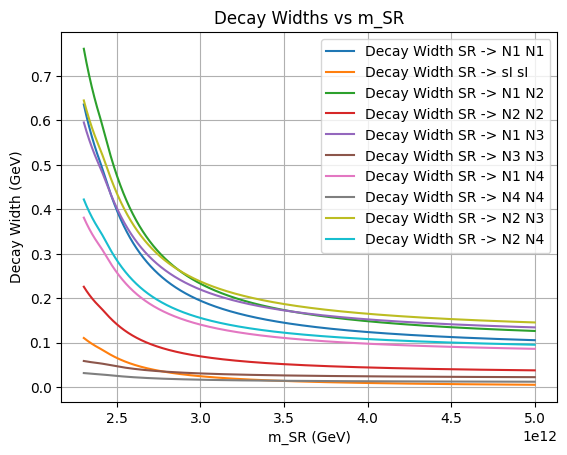

In [ ]:
mSR_list_test = np.linspace(2.3*mSI, 5*TeV, 10000)
total_decay_widths_test = [Total_decay_width(mSR) for mSR in mSR_list_test]
decaywidth_SR_N1N1 = [decaywidthSRtoN1N1(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_SISI = [decay_width_sR_sI_sI(mSR, mSI, l1, ls, v_s) for mSR in mSR_list_test]
decay_width_SR_N1N2 = [decaywidthsRtoN1N2(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_N2N2 = [decaywidthSRtoN2N2(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_N1N3 = [decaywidthSRtoN1N3(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_N3N3 = [decaywidthSRtoN3N3(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_N1N4 = [decaywidthSRtoN1N4(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_N4N4 = [decaywidthSRtoN4N4(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_N2N3 = [decaywidthSRtoN2N3(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_N2N4 = [decaywidthSRtoN2N4(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_N3N4 = [decaywidthSRtoN3N4(mSR, mN_list, U_R, V_L, lamN) for mSR in mSR_list_test]
decay_width_SR_WW = [SRtoWW(mSR) for mSR in mSR_list_test]
decay_width_SR_ZZ = [SRtoZZ(mSR) for mSR in mSR_list_test]
decay_width_SR_hh = [SRtohh(mSR) for mSR in mSR_list_test]
decay_width_SR_tt = [SRtoffbar(mSR, mtop, 3) for mSR in mSR_list_test]
decay_width_SR_bb = [SRtoffbar(mSR, mbottom, 3) for mSR in mSR_list_test]
decay_width_SR_tautau = [SRtoffbar(mSR, mtau, 1) for mSR in mSR_list_test]   

BR_N1N1 = [deca_N1N1/total if total > 0 else 0 for deca_N1N1, total in zip(decaywidth_SR_N1N1, total_decay_widths_test)]
BR_sRsI = [deca_sRsI/total if total > 0 else 0 for deca_sRsI, total in zip(decay_width_SR_SISI, total_decay_widths_test)]
BR_N1N2 = [deca_N1N2/total if total > 0 else 0 for deca_N1N2, total in zip(decay_width_SR_N1N2, total_decay_widths_test)]
BR_N2N2 = [deca_N2N2/total if total > 0 else 0 for deca_N2N2, total in zip(decay_width_SR_N2N2, total_decay_widths_test)]
BR_N1N3 = [deca_N1N3/total if total > 0 else 0 for deca_N1N3, total in zip(decay_width_SR_N1N3, total_decay_widths_test)]
BR_N3N3 = [deca_N3N3/total if total > 0 else 0 for deca_N3N3, total in zip(decay_width_SR_N3N3, total_decay_widths_test)]
BR_N1N4 = [deca_N1N4/total if total > 0 else 0 for deca_N1N4, total in zip(decay_width_SR_N1N4, total_decay_widths_test)]
BR_N4N4 = [deca_N4N4/total if total > 0 else 0 for deca_N4N4, total in zip(decay_width_SR_N4N4, total_decay_widths_test)]
BR_N2N3 = [deca_N2N3/total if total > 0 else 0 for deca_N2N3, total in zip(decay_width_SR_N2N3, total_decay_widths_test)]
BR_N2N4 = [deca_N2N4/total if total > 0 else 0 for deca_N2N4, total in zip(decay_width_SR_N2N4, total_decay_widths_test)]
BR_N3N4 = [deca_N3N4/total if total > 0 else 0 for deca_N3N4, total in zip(decay_width_SR_N3N4, total_decay_widths_test)]
BR_WW = [deca_WW/total if total > 0 else 0 for deca_WW, total in zip(decay_width_SR_WW, total_decay_widths_test)]
BR_ZZ = [deca_ZZ/total if total > 0 else 0 for deca_ZZ, total in zip(decay_width_SR_ZZ, total_decay_widths_test)]
BR_hh = [deca_hh/total if total > 0 else 0 for deca_hh, total in zip(decay_width_SR_hh, total_decay_widths_test)]
BR_tt = [deca_tt/total if total > 0 else 0 for deca_tt, total in zip(decay_width_SR_tt, total_decay_widths_test)]
BR_bb = [deca_bb/total if total > 0 else 0 for deca_bb, total in zip(decay_width_SR_bb, total_decay_widths_test)]
BR_tautau = [deca_tautau/total if total > 0 else 0 for deca_tautau, total in zip(decay_width_SR_tautau, total_decay_widths_test)]
plt.plot(mSR_list_test, BR_N1N1, label='Decay Width SR -> N1 N1')
plt.plot(mSR_list_test, BR_sRsI, label='Decay Width SR -> sI sI')
plt.plot(mSR_list_test, BR_N1N2, label='Decay Width SR -> N1 N2')
plt.plot(mSR_list_test, BR_N2N2, label='Decay Width SR -> N2 N2')
plt.plot(mSR_list_test, BR_N1N3, label='Decay Width SR -> N1 N3')
plt.plot(mSR_list_test, BR_N3N3, label='Decay Width SR -> N3 N3')   
plt.plot(mSR_list_test, BR_N1N4, label='Decay Width SR -> N1 N4')
plt.plot(mSR_list_test, BR_N4N4, label='Decay Width SR -> N4 N4')
plt.plot(mSR_list_test, BR_N2N3, label='Decay Width SR -> N2 N3')
plt.plot(mSR_list_test, BR_N2N4, label='Decay Width SR -> N2 N4')
#plt.yscale('log')
plt.xlabel('m_SR (GeV)')
plt.ylabel('Decay Width (GeV)')
plt.title('Decay Widths vs m_SR')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def v_s(lh,lp):
    return np.sqrt((2.0*lh*(0.246**2) / lp))

def M11(lh, lp):
    return lp * v_s(lh, lp)**2

def M22( lh, lp, C):
    return 2 *v_s(lh,lp) **2*(C)

def M12_21(lh, lp):
    return -lp * v_s(lh,lp) * 0.246


def m_sR(a, b, c):
    A= 0.5*(a+b+np.sqrt( (a-b)**2 +4.0*c*c))
    if A>0 :
        return np.sqrt(A)
    else:
        return 0

def m_sI( lh, lp, C, l1):
    A= v_s(lh,lp)**2 * (C-2*l1 - 2.0*l1-lp**2/lh)
    if A >0 :
        return np.sqrt(A)
    else:
        return 0

def mass_neutrino(lambdaN, lh,lp):
    return lambdaN * v_s(lh, lp) / np.sqrt(2)



def kinematic_factor_new(a,b,c, lN,lp,lh):
    return 1/(4 * np.pi * m_sR(a,b,c)**2) * ((m_sR(a,b,c)**2 - 4 * (mass_neutrino(lN, lh,lp))**2)**1.5)



def decaywidthSRtoNiNj_new(a,b,c, U_R, V_L, lN,i,j,lh,lp,lN_tilde):
    Mi = lN_tilde * v_s(lh,lp) / np.sqrt(2)
    Mj = lN_tilde * v_s(lh,lp) / np.sqrt(2)

    
    if m_sR(a,b,c) < Mi + Mj:
        return 0

    else:

        kinematic_factor_value = kinematic_factor_new(a,b,c, lN_tilde, v_s(lh,lp),lp)
        tmp = 0.0 + 0.0j
        for l1 in range(lN.shape[0]):
            for l2 in range(lN.shape[1]):
                tmp += lN[l1, l2] * (U_R[l1, i] * V_L[l2, j] + U_R[l1, j] * V_L[l2, i])

        Mixing_factor_value = np.abs(tmp)**2

        return kinematic_factor_value * Mixing_factor_value


def decay_width_sR_sI_sI_new(l1, C,a,b,c,lh,lp ):
    #if m_sR(a,b,c) < 2 * m_sI(lh, lp, C, l1):
        #return 0.0
    #else:
        A =  (-4 * m_sI(lh, lp, C, l1)**2 + m_sR(a,b,c)**2) 
        if A > 0: 
             return np.sqrt(A)/ (32*np.pi * m_sR(a,b,c)**2)* (12 * v_s(lh,lp) * l1 - 2*v_s(lh,lp)* (C-2*l1))**2 
        else: 
                return 0.0
    
lN_tilde = 0.1

def BranchingRatioN1N1(a,b,c, U_R, V_L, lamN, l1, C,lh, lp,C_list):   
    return decaywidthSRtoNiNj_new(a,b,c, U_R, V_L, lamN, 0, 0,lh,lp,lN_tilde) / (2*decaywidthSRtoNiNj_new(a,b,c, U_R, V_L, lamN, 0, 0,lh,lp,lN_tilde) + decay_width_sR_sI_sI_new(l1, C,a,b,c,lh,lp))

m1 = 0.6
lh = 1/8
lamN = np.array([[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]])
U_R = np.ones((3,6)) * 1/np.sqrt(6)
V_L = np.ones((3,6)) * 1/np.sqrt(6)




N1=10
C_list = np.linspace(1, 4, N1)
C_list_new = [C * np.ones(N1) for C in C_list]
v_s_list = [np.sqrt(2*m1**2  /(C)) for C in C_list]
mN_list = [lN_tilde * v_s / np.sqrt(2) for v_s in v_s_list]
lp_list = [0.246**2 * lh / (2 * vs**2) for vs in v_s_list]
lambda1_lists = [np.random.uniform(low=-1.0, high=(C - lp**2/lh)/4, size=N1) for C in C_list]
lambda_S_list = [C - 2 * lambda1 for C, lambda1 in zip(C_list, lambda1_lists)]

BR= []


for lambda1_list,C_new,C, lp in zip(lambda1_lists,C_list_new,C_list, lp_list):
    br_values = []
    for lambda1 in lambda1_list:
        br = BranchingRatioN1N1(M11(lh,lp), M22(lh,lp,C), M12_21(lh,lp), U_R, V_L, lamN, lambda1, C,lh, lp,C_new)
        br_values.append(br)
    BR.append(br_values)



print(BR)
print(C_list_new[0])
print(v_s_list)
print(lp_list)
print(lambda1_lists[0])
test = [8*lambda1-C_list[0] for lambda1 in lambda1_lists[0]]  
print(test)
print(C_list)

[[0.5, 0.5, 0.5, 0.493158487919662, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.3731185010653684, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4635643617954059], [0.18349191809512694, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.4817973060903995, 0.5, 0.34044743987132337, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.2555184789012383, 0.5, 0.5, 0.19381628487782482, 0.13087333941495818, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.4553792027709884, 0.5, 0.5, 0.4923638428081001, 0.5, 0.17117309313902015, 0.5, 0.1166823396781762, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4313031537853237, 0.5, 0.5, 0.5], [0.3551694163120032, 0.5, 0.5, 0.5, 0.5, 0.07787080872945702, 0.5, 0.5, 0.5, 0.5]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.848528137423857, 0.7348469228349535, 0.6572670690061994, 0.6, 0.5554920598635309, 0.5196152422706632, 0.4898979485566356, 0.46475800154489, 0.44312936752559784, 0.4242640687119285]
[0.005253125, 0.00

[[2.400000174412085, 2.400000232549433, 2.4000002906867737, 2.4000003488241073, 2.400000406961434, 2.400000465098753, 2.400000523236066, 2.4000005813733702, 2.400000639510669, 2.40000069764796], [2.400000174412085, 2.400000232549433, 2.4000002906867737, 2.4000003488241073, 2.400000406961434, 2.400000465098753, 2.400000523236066, 2.4000005813733702, 2.400000639510669, 2.40000069764796], [2.400000174412085, 2.400000232549433, 2.4000002906867737, 2.4000003488241073, 2.400000406961434, 2.400000465098753, 2.400000523236066, 2.4000005813733702, 2.400000639510669, 2.40000069764796], [2.400000174412085, 2.400000232549433, 2.4000002906867737, 2.4000003488241073, 2.400000406961434, 2.400000465098753, 2.400000523236066, 2.4000005813733702, 2.400000639510669, 2.40000069764796], [2.400000174412085, 2.400000232549433, 2.4000002906867737, 2.4000003488241073, 2.400000406961434, 2.400000465098753, 2.400000523236066, 2.4000005813733702, 2.400000639510669, 2.40000069764796], [2.400000174412085, 2.4000002

(0.0, 5.0)

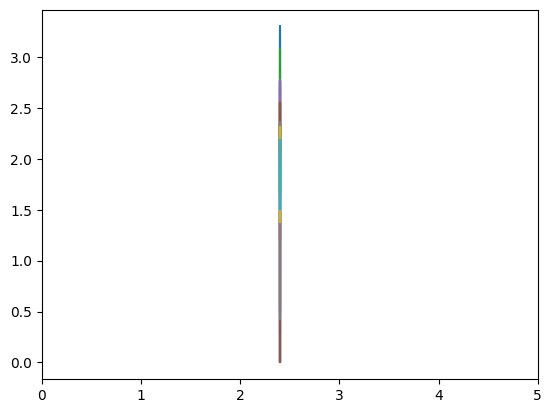

In [ ]:
m_sR_list = [[m_sR(M11(lh,lp), M22(lh,lp,C), M12_21(lh,lp)) for lambda1,lp,C in zip(lambda1_list, lp_list, C_list)] for  lambda1_list in lambda1_lists]
m_sI_list = [[m_sI(lh, lp, C, lambda1) for lambda1,lp,C in zip(lambda1_list, lp_list, C_list)] for  lambda1_list in lambda1_lists]

print(m_sR_list)
#for C , lambda1_list,lamdap,C_new in zip(C_list, lambda1_lists, lp_list, C_list_new):
    #plt.scatter(m_sR(M11(lh,lamdap), M22(lh,lamdap,C_new), M12_21(lh,lamdap)), m_sI(lh, lamdap, C, lambda1_list), label=f'C={C}')


plt.plot(m_sR_list, m_sI_list)
plt.xlim(0, 5)

In [ ]:
# Konstante
C = 3

# Anzahl der Punkte
N = 100

# lambda_1 < C/4
lambda1 = np.random.uniform(low=-1.0, high=(C-lp**2/lh)/4, size=N)

# Zwang aus der Gleichung
lambdaS = C - 2 * lambda1

print("lambda1=",lambda1)
print("lambdaS=",lambdaS)

C_new = C * np.ones(N)

C_1 = 1
C_1_new = C_1 * np.ones(N)

lambda1= [-0.71679127 -0.40057723 -0.74925371  0.09494847  0.5426489  -0.37204659
  0.04869823  0.00441616  0.65543628  0.62431848 -0.3584396   0.36664676
  0.4099115   0.73882156  0.13464401 -0.78971869 -0.16717844 -0.62281136
 -0.99293181  0.48497232  0.36501067 -0.60100856 -0.65138022 -0.04375683
 -0.61723072 -0.34689134 -0.91966884  0.46101299 -0.25148231  0.33751337
 -0.43042336 -0.38620806 -0.27560545 -0.25773856 -0.92529409 -0.27967206
  0.68140232  0.34547941 -0.78893652  0.30546509 -0.9572088  -0.17181462
  0.53257222 -0.85048062 -0.67189251  0.71828217 -0.67855276  0.55920967
  0.11703737 -0.23209792 -0.79784405 -0.04653975  0.54998356 -0.49823366
  0.49573485  0.30816208 -0.23016922 -0.42053484  0.30445597 -0.82696617
  0.16472987 -0.92630734 -0.67435324  0.2945321   0.01736572 -0.74827227
 -0.63760971 -0.88646068 -0.0258183   0.40176623 -0.58880786  0.378896
 -0.98895347 -0.09751934 -0.7378682   0.15070137 -0.72345532  0.56295516
  0.27672587  0.28938489  0.49633196 -0.3684

vs= 1.632993161855452
lp= 0.0014183437500000001
4.618802160111051


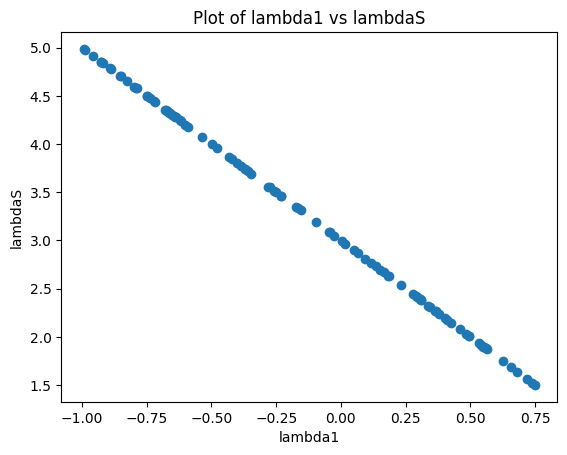

In [ ]:
plt.plot(lambda1, lambdaS, 'o')
plt.xlabel('lambda1')
plt.ylabel('lambdaS')
plt.title('Plot of lambda1 vs lambdaS')
plt.show()

In [ ]:
N1=100
C_list = np.linspace(0.1, 2.0, N1)
C_list_new = [C * np.ones(N1) for C in C_list]
lambda1_lists = [np.random.uniform(low=-1.0, high=(C - lp**2/lh)/4, size=N1) for C in C_list]
lambda_S_list = [C - 2 * lambda1 for C, lambda1 in zip(C_list, lambda1_lists)]

BR= []


for lambda1_list,C_new,C in zip(lambda1_lists,C_list_new,C_list):
    br_values = []
    for lambda1 in lambda1_list:
        br = BranchingRatioN1N1(M11(lh,lp), M22(lh,lp,C), M12_21(lh,lp), MN_list, U_R, V_L, lamN, lambda1, C,lh, lp,C_new)
        br_values.append(br)
    BR.append(br_values)



print(BR)

ZeroDivisionError: float division by zero

In [ ]:
branching_ratios = [BranchingRatioN1N1(M11(lh,lp), M22(lh,lp,c), M12_21(lh,lp), MN_list, U_R, V_L, lamN, l1, c, lh, lp, C_list) 
					for l1, c in zip(lambda1, C_new)]



print(branching_ratios)


#plt.scatter(m_sR(M11(lh,lp), M22(lh,lp,C_new), M12_21(lh,lp)),m_sI(lh,lp,C_new,lambda1), c=branching_ratios, cmap='viridis', marker='o')

plt.colorbar(label='Branching Ratio SR -> N1 N1')
plt.xlabel('m_SR (TeV)')
plt.ylabel('m_sI (TeV)')
plt.title('Branching Ratio SR -> N1 N1 in m_SR vs m_sI plane')
plt.show()

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49938658447099876, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4991531575962914, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49912732118888015, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49962054336055256, 0.5, 0.49970126186482033, 0.4998650772467435, 0.5, 0.5, 0.4996042921951024, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49926557054244536, 0.4993502345444104, 0.5, 0.5, 0.49898755239501597, 0.5, 0.5, 0.5, 0.4991968306408817, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49906071838451427, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49914046119971983, 0.5, 0.5, 0.5, 0.5]


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 640x480 with 0 Axes>

/var/folders/gm/nqgbbw_d2bq7qvkj2g9b25dw0000gn/T/ipykernel_17689/3438155168.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1)


nan